In [1]:
# Import packages

%matplotlib inline

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Import datasets
# Change paths for different computer

rookieQB2018_path = r'C:\Users\Jeremy\Desktop\RookieQB2018.csv'
rookieQBPrev_path = r'C:\Users\Jeremy\Desktop\RookieQB08-17.csv'
projQB_path = r'C:\Users\Jeremy\Desktop\QB_Projected.csv'
trainingQB_path = r'C:\Users\Jeremy\Desktop\QB_Aggregate.csv'
QB2018_path = r'C:\Users\Jeremy\Desktop\QB2018.csv'
dfRookieQB2018 = pd.read_csv(rookieQB2018_path)
dfRookieQBPrev = pd.read_csv(rookieQBPrev_path)
dfProjectedQB = pd.read_csv(projQB_path)
dfTrainingQB = pd.read_csv(trainingQB_path)
dfQB2018 = pd.read_csv(QB2018_path)
dfRookieQBPrev.columns

Index(['Name', 'GP-Col', 'Cmp-Col', 'PAtt-Col', 'Pct-Col', 'PYDS-Col',
       'PY/A-Col', 'PTD-Col', 'Int-Col', 'Rating-Col', 'RuATT-Col',
       'RuYDS-Col', 'RuY/A-Col', 'RuTD-Col', 'Height', 'Weight', '40 Time',
       'Vertical', 'Broad Jump', 'Wonderlic', 'GP', 'Cmp', 'PAtt', 'Pct',
       'PYDS', 'PY/A', 'PTD', 'Int', 'Rating', 'RuATT', 'RuYDS', 'RuY/A',
       'RuTD', 'FantPt'],
      dtype='object')

In [3]:
dfRookieQB2018.head()

,Name,GP,Cmp,PAtt,Pct,PYDS,PY/A,PTD,Int,Rating,...,RuYDS,RuY/A,RuTD,Height,Weight,40 Time,Vertical,Broad Jump,Wonderlic,Expected GS
0,Baker Mayfield,48,1026,1497,68.5,14607,9.8,131,30,175.4,...,1083,2.7,21,73,215,4.84,29.0,111,25,10
1,Sam Darnold,27,549,846,64.9,7229,8.5,57,22,153.7,...,332,2.4,7,75,225,4.85,26.5,105,28,12
2,Josh Allen,27,365,649,56.2,5066,7.8,44,21,137.7,...,767,3.2,12,77,237,4.75,33.5,119,37,11
3,Josh Rosen,30,712,1170,60.9,9340,8.0,59,26,140.1,...,-154,-1.4,6,76,218,4.92,31.0,111,29,9


In [4]:
dfRookieQBPrev.columns

Index(['Name', 'GP-Col', 'Cmp-Col', 'PAtt-Col', 'Pct-Col', 'PYDS-Col',
       'PY/A-Col', 'PTD-Col', 'Int-Col', 'Rating-Col', 'RuATT-Col',
       'RuYDS-Col', 'RuY/A-Col', 'RuTD-Col', 'Height', 'Weight', '40 Time',
       'Vertical', 'Broad Jump', 'Wonderlic', 'GP', 'Cmp', 'PAtt', 'Pct',
       'PYDS', 'PY/A', 'PTD', 'Int', 'Rating', 'RuATT', 'RuYDS', 'RuY/A',
       'RuTD', 'FantPt'],
      dtype='object')

In [5]:
dfTrainingQB.head()

,Name,FantPt,G,COMP,PATT,PYDS,PTD,INT,YPA,RATT,...,SOS,OL Rnk,20+,40+,PIn20,PIn10,PIn5,RIn20,RIn10,RIn5
0,Andrew Luck,443.4,16,380,616,4761,40,16,7.73,64,...,0.8,7,73,15,93,46,20,16,5,1
1,Aaron Rodgers,410.0,16,341,520,4381,38,5,8.43,43,...,1.0,13,59,15,109,50,24,9,2,1
2,Drew Brees,392.5,16,456,659,4952,33,17,7.51,27,...,-0.3,12,52,10,87,34,19,4,3,1
3,Ben Roethlisberger,377.7,16,408,608,4952,32,9,8.14,33,...,-1.0,14,56,15,101,48,17,1,0,0
4,Russell Wilson,376.4,16,285,452,3475,20,7,7.69,118,...,1.6,24,54,8,64,24,8,16,7,1


In [6]:
# Deal with missing data

dfRookieQB2018 = dfRookieQB2018.fillna(0)
dfRookieQBPrev = dfRookieQBPrev.fillna(0)
dfTrainingQB = dfTrainingQB.fillna(0)
dfQB2018 = dfQB2018.fillna(0)
dfQB2018.head()

,Name,Projected GS,AVG COMP PER16,AVG PATT PER16,AVG PYDS PER 16,AVG PTD,AVG INT PER16,AVG YPA PER16,AVG RATT PER16,AVG RYDS PER16,AVG RTD PER16,AVG FMB PER16,SOS,OL Rnk
0,Aaron Rodgers,16,361,575,4364,35,8,7.6,58,295,3,8,-0.4,21
1,Deshaun Watson,14,327,505,4204,36,15,8.3,93,572,4,10,-0.9,31
2,Tom Brady,16,360,562,4228,31,10,7.5,35,61,1,7,-0.7,2
3,Russell Wilson,16,301,468,3688,28,9,7.9,92,521,2,10,0.6,29
4,Cam Newton,16,304,509,3743,24,14,7.4,123,636,8,7,0.0,12


In [7]:
# Train and test set construction for QB veterans

train, test = train_test_split(dfTrainingQB, test_size=0.2, random_state=42)
 
xtrain = train[['G', 'COMP', 'PATT', 'PYDS', 'PTD', 'INT', 'YPA',
       'RATT', 'RYDS', 'RTD', 'FMB', 'SOS', 'OL Rnk']]
ytrain = train[['FantPt']]
 
xtest = test[['G', 'COMP', 'PATT', 'PYDS', 'PTD', 'INT', 'YPA',
       'RATT', 'RYDS', 'RTD', 'FMB', 'SOS', 'OL Rnk']]
ytest = test[['FantPt']]

In [8]:
# Train and test set construction for QB rookies

train2, test2 = train_test_split(dfRookieQBPrev, test_size=0.2, random_state=42)
 
xtrain2 = train2[['GP-Col', 'Cmp-Col', 'PAtt-Col', 'Pct-Col', 'PYDS-Col',
       'PY/A-Col', 'PTD-Col', 'Int-Col', 'Rating-Col', 'RuATT-Col',
       'RuYDS-Col', 'RuY/A-Col', 'RuTD-Col', 'Height', 'Weight', '40 Time',
       'Vertical', 'Broad Jump', 'Wonderlic', 'GP']]
ytrain2 = train2[['FantPt']]
 
xtest2 = test2[['GP-Col', 'Cmp-Col', 'PAtt-Col', 'Pct-Col', 'PYDS-Col',
       'PY/A-Col', 'PTD-Col', 'Int-Col', 'Rating-Col', 'RuATT-Col',
       'RuYDS-Col', 'RuY/A-Col', 'RuTD-Col', 'Height', 'Weight', '40 Time',
       'Vertical', 'Broad Jump', 'Wonderlic', 'GP']]
ytest2 = test2[['FantPt']]

In [9]:
#Linear Regression for veterans

linReg = linear_model.LinearRegression()
linReg.fit(xtrain, ytrain)

y_predLin = linReg.predict(xtest)

print(y_predLin - ytest)

print('Coefficients: \n', linReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLin))
print('Variance score: %.3f' % r2_score(ytest, y_predLin))

      FantPt
84  0.105173
55 -7.680005
66 -0.168579
67  0.837749
45  0.038307
39  0.818909
22 -4.459065
44  0.405069
10  0.062341
0  -0.015804
18  1.444865
30  0.761881
97  0.302048
33  0.107957
77 -0.092729
4  -0.638748
93  0.571645
78  0.207824
12  0.451823
31 -0.335847
76  0.259172
Coefficients: 
 [[ 2.59537992e-02  5.24881824e-03  1.97644967e-02  4.64419997e-02
   3.98925812e+00  6.87714708e-02  1.81738098e+00 -2.13452587e-02
   1.03727493e-01  6.05799760e+00  1.26797293e-02 -2.01066817e-01
  -1.70145448e-02]]
Mean squared error: 4.019
Variance score: 0.999


In [10]:
#Linear Regression for rookies

linReg2 = linear_model.LinearRegression()
linReg2.fit(xtrain2, ytrain2)

y_predLin2 = linReg2.predict(xtest2)

print(y_predLin2 - ytest2)

print('Coefficients: \n', linReg2.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_predLin2))
print('Variance score: %.3f' % r2_score(ytest2, y_predLin2))

        FantPt
29  -36.621477
15   27.744933
24  -91.540937
17   72.335245
8  -202.645377
9    -5.036582
30  -39.845394
Coefficients: 
 [[-7.78946412e-01 -1.47192803e+00 -1.69572237e-02  1.13502025e+01
   1.28424571e-01 -1.02320874e+02 -1.08772929e+00  2.64199420e+00
   2.31649352e+00  1.83349129e-01  6.26488792e-02  6.01403758e+00
  -6.15387363e+00  2.13887294e+01 -8.81414471e-01  1.13746835e+01
   3.33787942e+00 -1.24399215e+00 -2.71000191e+00  1.73469224e+01]]
Mean squared error: 8343.031
Variance score: 0.313


In [11]:
# Ridge Regression for veterans

ridgeReg = linear_model.Ridge(alpha = 50)

ridgeReg.fit(xtrain, ytrain)

y_predRidge = ridgeReg.predict(xtest)

print(y_predRidge - ytest)

print('Coefficients: \n', ridgeReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predRidge))
print('Variance score: %.3f' % r2_score(ytest, y_predRidge))

      FantPt
84  3.856832
55 -3.064834
66 -2.482279
67  1.988078
45 -3.751941
39  3.245412
22 -8.513896
44  3.016659
10 -0.663772
0  -1.577044
18  2.665891
30  0.887092
97  1.046829
33  0.239211
77  1.645679
4   0.530379
93 -1.138034
78  2.329233
12  1.221606
31 -0.961237
76  3.536265
Coefficients: 
 [[-0.05295394  0.01120897 -0.02118851  0.05280444  3.74258226  0.08268602
   0.0721067   0.04983952  0.10620035  4.65727912  0.01913793 -0.34371509
  -0.07982501]]
Mean squared error: 8.437
Variance score: 0.998


In [12]:
# Ridge Regression for rookies

ridgeReg2 = linear_model.Ridge(alpha = 50)

ridgeReg2.fit(xtrain2, ytrain2)

y_predRidge2 = ridgeReg2.predict(xtest2)

print(y_predRidge2 - ytest2)

print('Coefficients: \n', ridgeReg2.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_predRidge2))
print('Variance score: %.3f' % r2_score(ytest2, y_predRidge2))

        FantPt
29  -20.462468
15  -53.136343
24  -16.010043
17   73.621606
8  -146.244277
9    -8.175481
30  -83.931416
Coefficients: 
 [[ 1.15149556 -0.38245731 -0.08258001 -0.21347546  0.06768703  0.11117347
  -2.76885009  0.13514363  1.1178399  -0.01929334  0.06113963  2.31800899
  -4.61678541  1.41548957  1.34938508  1.73973313  1.74911784 -0.69471521
  -1.72943457 13.58596605]]
Mean squared error: 5345.336
Variance score: 0.560


In [13]:
# Bayesian Ridge for veterans

bayesianRidge = linear_model.BayesianRidge()

bayesianRidge.fit(xtrain, ytrain)

y_pred_bayesianRidge = bayesianRidge.predict(xtest)

print('Coefficients: \n', bayesianRidge.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_pred_bayesianRidge))
print('Variance score: %.3f' % r2_score(ytest, y_pred_bayesianRidge))

Coefficients: 
 [ 9.77617484e-03  4.98183688e-03  1.09564132e-02  4.77068669e-02
  3.98808008e+00  6.50117936e-02  1.16337127e+00 -1.91486123e-02
  1.03704869e-01  6.03333613e+00  1.53905401e-02 -2.09775088e-01
 -2.00032663e-02]
Mean squared error: 3.974
Variance score: 0.999


c:\users\jeremy\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
# Bayesian Ridge for rookies

bayesianRidge2 = linear_model.BayesianRidge()

bayesianRidge2.fit(xtrain2, ytrain2)

y_pred_bayesianRidge2 = bayesianRidge2.predict(xtest2)

print('Coefficients: \n', bayesianRidge2.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_pred_bayesianRidge2))
print('Variance score: %.3f' % r2_score(ytest2, y_pred_bayesianRidge2))

Coefficients: 
 [ 3.74293002e-06  1.73609465e-05 -3.69618443e-05  3.16463076e-06
  8.04281573e-04  1.03404073e-06  1.31824740e-05 -4.14272342e-06
  1.67323749e-05 -2.17218300e-05  1.81015918e-04  1.62372604e-06
 -4.95935385e-06  1.29600157e-07  3.97907875e-06  5.14599145e-07
  2.63702788e-06  6.38674460e-06  1.68544290e-06  1.25450283e-05]
Mean squared error: 12472.561
Variance score: -0.028


c:\users\jeremy\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
# Support Vector Regression for veterans

svr_rbf = SVR(kernel='rbf', gamma=1e-3, C=200, epsilon=0.1)
svr_rbf.fit(xtrain, ytrain.values.ravel())

y_supp = svr_rbf.predict(xtest)

print(y_supp - ytest['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_supp))
print('Variance score: %.3f' % r2_score(ytest, y_supp))

84     16.426917
55    -24.483518
66     29.406435
67     61.463763
45   -132.353981
39     26.258737
22    -98.868178
44    136.043559
10    -16.118341
0    -133.641294
18     87.140364
30    -48.541213
97    128.758706
33    -31.437586
77    -27.653301
4     -66.641294
93     51.698827
78    -19.202341
12     -2.541284
31    -45.740540
76    -37.841043
Name: FantPt, dtype: float64
Mean squared error: 5210.293
Variance score: -0.008


In [16]:
# Support Vector Regression for rookies

svr_rbf2 = SVR(kernel='rbf', gamma=1e-3, C=200, epsilon=0.1)
svr_rbf2.fit(xtrain2, ytrain2.values.ravel())

y_supp2 = svr_rbf2.predict(xtest2)

print(y_supp2 - ytest2['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_supp2))
print('Variance score: %.3f' % r2_score(ytest2, y_supp2))

29    148.668
15    -24.332
24    -51.332
17     25.668
8    -216.332
9     109.668
30    -14.332
Name: FantPt, dtype: float64
Mean squared error: 12145.722
Variance score: -0.001


In [17]:
# Random Forest Regression for veterans

randomForest = RandomForestRegressor(n_estimators = 100, max_depth = 50)
randomForest.fit(xtrain, ytrain.values.ravel())

y_rand = randomForest.predict(xtest)
print(y_rand - ytest['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_rand))
print('Variance score: %.3f' % r2_score(ytest, y_rand))

84    25.566
55    -0.864
66    -3.382
67     7.336
45   -39.063
39    27.363
22    -7.363
44    14.339
10    -1.751
0    -38.801
18   -18.424
30   -10.600
97     8.420
33    -1.786
77     5.132
4    -50.499
93     9.653
78     7.013
12   -21.588
31   -16.704
76    -1.702
Name: FantPt, dtype: float64
Mean squared error: 416.923
Variance score: 0.919


In [18]:
# Random Forest Regression for rookies

randomForest2 = RandomForestRegressor(n_estimators = 100, max_depth = 50)
randomForest2.fit(xtrain2, ytrain2.values.ravel())

y_rand2 = randomForest2.predict(xtest2)
print(y_rand2 - ytest2['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_rand2))
print('Variance score: %.3f' % r2_score(ytest2, y_rand2))

29     49.70
15     -1.71
24    -76.52
17    -12.51
8    -125.04
9      28.72
30   -107.68
Name: FantPt, dtype: float64
Mean squared error: 5219.950
Variance score: 0.570


In [19]:
# Gradient Boosting Regression for veterans

gradBoost = GradientBoostingRegressor()
gradBoost.fit(xtrain, ytrain.values.ravel())

y_grad = gradBoost.predict(xtest)
print(y_grad - ytest['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_grad))
print('Variance score: %.3f' % r2_score(ytest, y_grad))

84    25.334045
55    -0.857703
66   -16.029255
67     6.841500
45   -31.978377
39    29.717023
22     6.740192
44    -0.643053
10     4.720036
0    -30.007561
18   -15.266292
30     9.865408
97    -3.579779
33     0.105737
77     1.644478
4    -34.388840
93    -7.606166
78     1.115242
12   -13.825366
31    -1.698567
76    -0.051763
Name: FantPt, dtype: float64
Mean squared error: 266.772
Variance score: 0.948


In [20]:
# Gradient Boosting Regression for rookies

gradBoost2 = GradientBoostingRegressor()
gradBoost2.fit(xtrain2, ytrain2.values.ravel())

y_grad2 = gradBoost2.predict(xtest2)
print(y_grad2 - ytest2['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_grad2))
print('Variance score: %.3f' % r2_score(ytest2, y_grad2))

29     27.343076
15     -8.370747
24    -78.212828
17     -7.699079
8    -107.221849
9      -9.789199
30   -129.679188
Name: FantPt, dtype: float64
Mean squared error: 5057.612
Variance score: 0.583


c:\users\jeremy\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


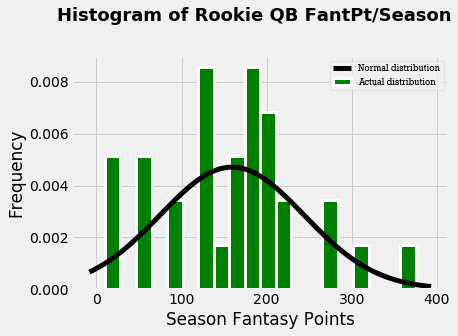

In [21]:
# Histogram graph of rookie QB fantasy points scored in a season

plt.style.use('fivethirtyeight')
rookiefantpthist, ax = plt.subplots()

ax.hist(dfRookieQBPrev['FantPt'], bins = 20, color = 'green',edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
rookiefantpthist.suptitle("Histogram of Rookie QB FantPt/Season", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Season Fantasy Points")
ax.set_ylabel("Frequency")

overall_mean = dfRookieQBPrev['FantPt'].mean()
overall_std = dfRookieQBPrev['FantPt'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='black', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

rookiefantpthist.savefig('rookieqb-fantpt-history.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 0.09243963511079045 , intercept = 61.77925009198686 , r_value = 0.1071301042347055 , p_value = 0.5594948475006833 , std_err = 0.156631637351264


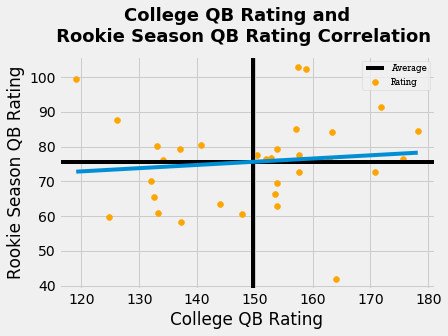

In [27]:
# Scatter plot of correlation between College QB Rating and Rookie season QB Rating

plt.style.use('fivethirtyeight')
 
rookieqbrating, ax = plt.subplots()

ax.scatter(dfRookieQBPrev['Rating-Col'], dfRookieQBPrev['Rating'], color = 'orange')
ax.axvline(x = np.mean(dfRookieQBPrev['Rating-Col']), color = 'black')
ax.axhline(y = np.mean(dfRookieQBPrev['Rating']), label = "Average", color = 'black')
rookieqbrating.suptitle("College QB Rating and \n Rookie Season QB Rating Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("College QB Rating")
ax.set_ylabel("Rookie Season QB Rating")
 
ax.plot(np.unique(dfRookieQBPrev['Rating-Col']), np.poly1d(np.polyfit(dfRookieQBPrev['Rating-Col'], dfRookieQBPrev['Rating'], 1))(np.unique(dfRookieQBPrev['Rating-Col'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieQBPrev['Rating-Col'], dfRookieQBPrev['Rating'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookieqbrating.savefig('college-nfl-rating.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 0.4440925155804961 , intercept = 28.87989539773145 , r_value = 0.385541584505614 , p_value = 0.02931557042602558 , std_err = 0.19404284317658516


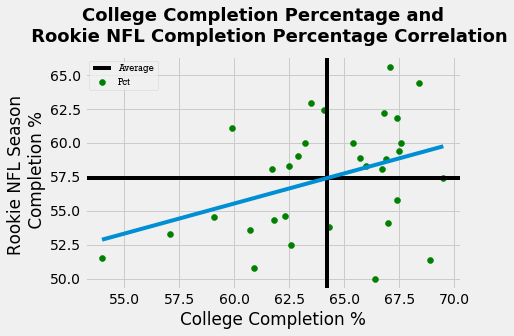

In [28]:
# Scatter plot of correlation between College Completion Percentage and Rookie Season Completion Percentage

plt.style.use('fivethirtyeight')
 
rookieqbpct, ax = plt.subplots()

ax.scatter(dfRookieQBPrev['Pct-Col'], dfRookieQBPrev['Pct'], color = 'green')
ax.axvline(x = np.mean(dfRookieQBPrev['Pct-Col']), color = 'black')
ax.axhline(y = np.mean(dfRookieQBPrev['Pct']), label = "Average", color = 'black')
rookieqbpct.suptitle("College Completion Percentage and \n Rookie NFL Completion Percentage Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("College Completion %")
ax.set_ylabel("Rookie NFL Season \n Completion %")
 
ax.plot(np.unique(dfRookieQBPrev['Pct-Col']), np.poly1d(np.polyfit(dfRookieQBPrev['Pct-Col'], dfRookieQBPrev['Pct'], 1))(np.unique(dfRookieQBPrev['Pct-Col'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieQBPrev['Pct-Col'], dfRookieQBPrev['Pct'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookieqbpct.savefig('college-nfl-pct.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 2.392457281571292 , intercept = -198.56651503908495 , r_value = 0.43396910913194 , p_value = 0.013080588353919327 , std_err = 0.9068066838730607


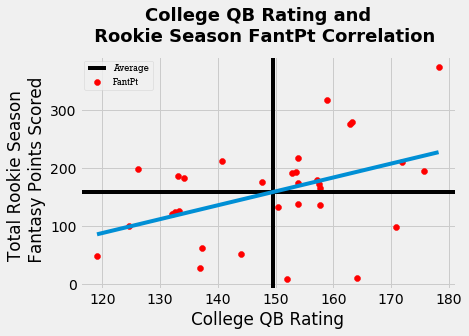

In [29]:
# Scatter plot of correlation between College QB Rating and Rookie Fantasy points scored in a season

plt.style.use('fivethirtyeight')
 
rookieqbratingfantpt, ax = plt.subplots()

ax.scatter(dfRookieQBPrev['Rating-Col'], dfRookieQBPrev['FantPt'], color = 'red')
ax.axvline(x = np.mean(dfRookieQBPrev['Rating-Col']), color = 'black')
ax.axhline(y = np.mean(dfRookieQBPrev['FantPt']), label = "Average", color = 'black')
rookieqbratingfantpt.suptitle("College QB Rating and \n Rookie Season FantPt Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("College QB Rating")
ax.set_ylabel("Total Rookie Season \n Fantasy Points Scored")
 
ax.plot(np.unique(dfRookieQBPrev['Rating-Col']), np.poly1d(np.polyfit(dfRookieQBPrev['Rating-Col'], dfRookieQBPrev['FantPt'], 1))(np.unique(dfRookieQBPrev['Rating-Col'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieQBPrev['Rating-Col'], dfRookieQBPrev['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookieqbratingfantpt.savefig('rookieqbrating-fantpt.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 7.3671138792641555 , intercept = -313.80091112661313 , r_value = 0.31439086528926363 , p_value = 0.07969640953923732 , std_err = 4.061321783178771


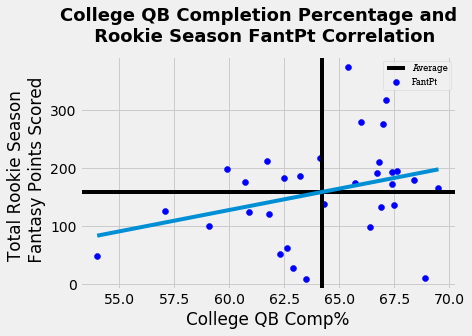

In [30]:
# Scatter plot of correlation between College Completion% and Rookie Fantasy points scored in a season

plt.style.use('fivethirtyeight')
 
rookieqbcompfantpt, ax = plt.subplots()

ax.scatter(dfRookieQBPrev['Pct-Col'], dfRookieQBPrev['FantPt'], color = 'blue')
ax.axvline(x = np.mean(dfRookieQBPrev['Pct-Col']), color = 'black')
ax.axhline(y = np.mean(dfRookieQBPrev['FantPt']), label = "Average", color = 'black')
rookieqbcompfantpt.suptitle("College QB Completion Percentage and \n Rookie Season FantPt Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("College QB Comp%")
ax.set_ylabel("Total Rookie Season \n Fantasy Points Scored")
 
ax.plot(np.unique(dfRookieQBPrev['Pct-Col']), np.poly1d(np.polyfit(dfRookieQBPrev['Pct-Col'], dfRookieQBPrev['FantPt'], 1))(np.unique(dfRookieQBPrev['Pct-Col'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieQBPrev['Pct-Col'], dfRookieQBPrev['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookieqbcompfantpt.savefig('rookieqbcomp-fantpt.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 0.6886794692240131 , intercept = 139.89828376100837 , r_value = 0.05296031580777541 , p_value = 0.7734451971626201 , std_err = 2.370806085264293


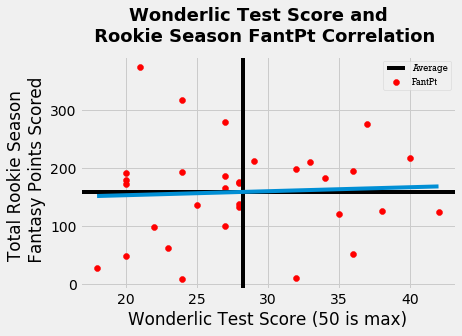

In [32]:
# Scatter plot of correlation between Wonderlic test Score and Rookie Fantasy points scored in a season

plt.style.use('fivethirtyeight')
 
wonderlicfantpt, ax = plt.subplots()

ax.scatter(dfRookieQBPrev['Wonderlic'], dfRookieQBPrev['FantPt'], color = 'red')
ax.axvline(x = np.mean(dfRookieQBPrev['Wonderlic']), color = 'black')
ax.axhline(y = np.mean(dfRookieQBPrev['FantPt']), label = "Average", color = 'black')
wonderlicfantpt.suptitle("Wonderlic Test Score and \n Rookie Season FantPt Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Wonderlic Test Score (50 is max)")
ax.set_ylabel("Total Rookie Season \n Fantasy Points Scored")
 
ax.plot(np.unique(dfRookieQBPrev['Wonderlic']), np.poly1d(np.polyfit(dfRookieQBPrev['Wonderlic'], dfRookieQBPrev['FantPt'], 1))(np.unique(dfRookieQBPrev['Wonderlic'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieQBPrev['Wonderlic'], dfRookieQBPrev['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

wonderlicfantpt.savefig('wonderlic-fantpt.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = -1.8112810801123123 , intercept = 340.9105656251867 , r_value = -0.250675095186439 , p_value = 0.01145827619368978 , std_err = 0.7030146889298847


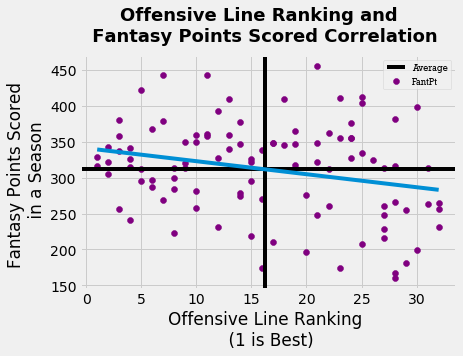

In [33]:
# Scatter plot of correlation between Offensive Line Ranking (pass protection) and Fantasy Points scored in a season

plt.style.use('fivethirtyeight')
 
offensivelinefantpt, ax = plt.subplots()

ax.scatter(dfTrainingQB['OL Rnk'], dfTrainingQB['FantPt'], color = 'purple')
ax.axvline(x = np.mean(dfTrainingQB['OL Rnk']), color = 'black')
ax.axhline(y = np.mean(dfTrainingQB['FantPt']), label = "Average", color = 'black')
offensivelinefantpt.suptitle("Offensive Line Ranking and \n Fantasy Points Scored Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Offensive Line Ranking \n (1 is Best)")
ax.set_ylabel("Fantasy Points Scored \n in a Season")
 
ax.plot(np.unique(dfTrainingQB['OL Rnk']), np.poly1d(np.polyfit(dfTrainingQB['OL Rnk'], dfTrainingQB['FantPt'], 1))(np.unique(dfTrainingQB['OL Rnk'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfTrainingQB['OL Rnk'], dfTrainingQB['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

offensivelinefantpt.savefig('OLrnk-fantpt.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 2.1510745736828683 , intercept = 311.2297392720794 , r_value = 0.032250916923910834 , p_value = 0.7488420244416711 , std_err = 6.699923221469908


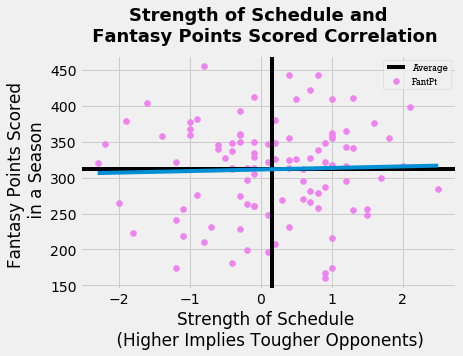

In [34]:
# Scatter plot of correlation between Strength of Schedule and Fantasy Points scored in a season

plt.style.use('fivethirtyeight')
 
sosfantpt, ax = plt.subplots()

ax.scatter(dfTrainingQB['SOS'], dfTrainingQB['FantPt'], color = 'violet')
ax.axvline(x = np.mean(dfTrainingQB['SOS']), color = 'black')
ax.axhline(y = np.mean(dfTrainingQB['FantPt']), label = "Average", color = 'black')
sosfantpt.suptitle("Strength of Schedule and \n Fantasy Points Scored Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Strength of Schedule \n (Higher Implies Tougher Opponents)")
ax.set_ylabel("Fantasy Points Scored \n in a Season")
 
ax.plot(np.unique(dfTrainingQB['SOS']), np.poly1d(np.polyfit(dfTrainingQB['SOS'], dfTrainingQB['FantPt'], 1))(np.unique(dfTrainingQB['SOS'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfTrainingQB['SOS'], dfTrainingQB['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

sosfantpt.savefig('sos-fantpt.png', dpi = 400, bbox_inches = 'tight')

In [35]:
# Linear Regression predictions 
# Rookies

rookieQB = dfRookieQB2018.loc[:, 'GP': 'Expected GS']
linear_predsR = linReg2.predict(rookieQB)

veteranQB = dfQB2018.loc[:, 'Projected GS': 'OL Rnk']
linear_predsV = linReg.predict(veteranQB)

linear_preds = []
rows = 0
cols = 0

namesR = dfRookieQB2018.iloc[:, 0]
print("2018 NFL season fantasy points prediction for rookie QBs using Linear Regression: ")
for i in(namesR):
    linear_preds.append([i, linear_predsR[rows][cols]])
    print(i, linear_predsR[rows][cols])  
    rows+=1
    
print()

# Veterans
rows = 0
cols = 0
namesV = dfQB2018.iloc[:, 0]
print("2018 NFL season fantasy points prediction for veteran QBs using Linear Regression: ")
for i in(namesV):
    linear_preds.append([i, linear_predsV[rows][cols]])
    print(i, linear_predsV[rows][cols])  
    rows+=1
    
names = namesR.append(namesV)

2018 NFL season fantasy points prediction for rookie QBs using Linear Regression: 
Baker Mayfield 222.66920559602863
Sam Darnold 154.0105814938761
Josh Allen 112.62038653266563
Josh Rosen 88.88742787439742

2018 NFL season fantasy points prediction for veteran QBs using Linear Regression: 
Aaron Rodgers 405.65368261157863
Deshaun Watson 436.35108200947786
Tom Brady 347.54778489576023
Russell Wilson 360.86519278457945
Cam Newton 395.71052041092247
Drew Brees 365.50752611277676
Carson Wentz 339.6185032232936
Kirk Cousins 369.9990782988283
Andrew Luck 395.5323978360132
Matthew Stafford 353.0538235192804
Ben Roethlisberger 333.966396726006
Jimmy Garoppolo 365.07920356257495
Matt Ryan 339.02924496081886
Philip Rivers 331.58348428081797
Jared Goff 328.50157688102394
Dak Prescott 334.4163379967254
Alex Smith 283.5830881864329
Derek Carr 305.2906490985876
Marcus Mariota 319.8221363611607
Jameis Winston 362.41224903311576
Eli Manning 298.6497796725589
Tyrod Taylor 337.54187849326706
Mitchell Tr

In [36]:
# Ridge Regression predictions 
# Rookies

rows = 0
cols = 0
ridge_preds = []
ridge_predsR = ridgeReg2.predict(rookieQB)
print("2018 NFL season fantasy points prediction for rookie QBs using Ridge Regression: ")
for i in(namesR):
    ridge_preds.append([i, ridge_predsR[rows][cols]])
    print(i, ridge_predsR[rows][cols])  
    rows+=1
    
print()

# Veterans
rows = 0
cols = 0
ridge_predsV = ridgeReg.predict(veteranQB)
print("2018 NFL season fantasy points prediction for veteran QBs using Ridge Regression: ")
for i in(namesV):
    ridge_preds.append([i, ridge_predsV[rows][cols]])
    print(i, ridge_predsV[rows][cols])  
    rows+=1

2018 NFL season fantasy points prediction for rookie QBs using Ridge Regression: 
Baker Mayfield 193.56297742942638
Sam Darnold 147.6554020469273
Josh Allen 103.29609452764294
Josh Rosen 105.44099725924457

2018 NFL season fantasy points prediction for veteran QBs using Ridge Regression: 
Aaron Rodgers 403.3681664496503
Deshaun Watson 435.73035553534714
Tom Brady 347.9277394378418
Russell Wilson 363.2677424998391
Cam Newton 393.95151281571526
Drew Brees 365.5197913288348
Carson Wentz 340.7453055456522
Kirk Cousins 368.897082763173
Andrew Luck 395.12638508114105
Matthew Stafford 351.7382252788547
Ben Roethlisberger 335.78312240002424
Jimmy Garoppolo 368.41118455367143
Matt Ryan 339.4528041281723
Philip Rivers 333.31849620794304
Jared Goff 328.7243500913237
Dak Prescott 329.6169573475686
Alex Smith 284.9032582500339
Derek Carr 304.7393207981721
Marcus Mariota 320.04035740232746
Jameis Winston 362.763014690581
Eli Manning 298.23296859427177
Tyrod Taylor 338.52714719952235
Mitchell Trubisk

In [37]:
# Bayesian Ridge Regression predictions 
# Rookies

rows = 0
cols = 0
bayes_preds = []
bayes_predsR = bayesianRidge2.predict(rookieQB)
print("2018 NFL season fantasy points prediction for rookie QBs using Bayesian Ridge Regression: ")
for i in(namesR):
    bayes_preds.append([i, bayes_predsR[rows]])
    print(i, bayes_predsR[rows])  
    rows+=1
    
print()

# Veterans
rows = 0
cols = 0
bayes_predsV = bayesianRidge.predict(veteranQB)
print("2018 NFL season fantasy points prediction for veteran QBs using Bayesian Ridge Regression: ")
for i in(namesV):
    bayes_preds.append([i, bayes_predsV[rows]])
    print(i, bayes_predsV[rows])  
    rows+=1

2018 NFL season fantasy points prediction for rookie QBs using Bayesian Ridge Regression: 
Baker Mayfield 163.7551283203051
Sam Darnold 157.7054740790351
Josh Allen 156.04614160008484
Josh Rosen 159.3065667771786

2018 NFL season fantasy points prediction for veteran QBs using Bayesian Ridge Regression: 
Aaron Rodgers 405.6625256595386
Deshaun Watson 436.35608501770986
Tom Brady 347.6227533124499
Russell Wilson 360.85279105923325
Cam Newton 395.68409886970585
Drew Brees 365.5456880235315
Carson Wentz 339.65734841346995
Kirk Cousins 370.01798281704447
Andrew Luck 395.5954376677838
Matthew Stafford 352.98143399461196
Ben Roethlisberger 334.0605545767677
Jimmy Garoppolo 365.2263755231706
Matt Ryan 339.0444724231373
Philip Rivers 331.6346608082847
Jared Goff 328.4942193053786
Dak Prescott 334.2695935909731
Alex Smith 283.61236053426853
Derek Carr 305.2137844985798
Marcus Mariota 319.8040245185792
Jameis Winston 362.4762622891609
Eli Manning 298.59426978225287
Tyrod Taylor 337.7402058505564

In [38]:
# Support Vector Regression predictions 
# Rookies

rows = 0
svr_preds = []
svr_predsR = svr_rbf2.predict(rookieQB)
print("2018 NFL season fantasy points prediction for rookie QBs using Support Vector Regression: ")
for i in(namesR):
    svr_preds.append([i, svr_predsR[rows]])
    print(i, svr_predsR[rows])  
    rows+=1
    
print()

# Veterans
rows = 0
svr_predsV = svr_rbf.predict(veteranQB)
print("2018 NFL season fantasy points prediction for veteran QBs using Support Vector Regression: ")
for i in(namesV):
    svr_preds.append([i, svr_predsV[rows]])
    print(i, svr_predsV[rows])  
    rows+=1

# Not very accurate for QB, will not include in MSE/RMSE test for accuracy

2018 NFL season fantasy points prediction for rookie QBs using Support Vector Regression: 
Baker Mayfield 158.66800000000003
Sam Darnold 158.66800000000003
Josh Allen 158.66800000000003
Josh Rosen 158.66800001885272

2018 NFL season fantasy points prediction for veteran QBs using Support Vector Regression: 
Aaron Rodgers 311.0382793552561
Deshaun Watson 309.75870624083683
Tom Brady 310.40370799885966
Russell Wilson 309.75870624083655
Cam Newton 309.7707090453306
Drew Brees 313.50468628146206
Carson Wentz 309.96691126473144
Kirk Cousins 310.07733769135655
Andrew Luck 312.37205019878866
Matthew Stafford 311.54110948250377
Ben Roethlisberger 310.1210615464088
Jimmy Garoppolo 309.7588176963648
Matt Ryan 342.04882113301267
Philip Rivers 311.05049103704386
Jared Goff 309.7628817878468
Dak Prescott 309.87614065258765
Alex Smith 309.75586328924277
Derek Carr 309.7579475209615
Marcus Mariota 309.75978076843444
Jameis Winston 311.2314318159833
Eli Manning 309.81329741885844
Tyrod Taylor 309.7587

In [39]:
# Random Forest Regression predictions 
# Rookies

rows = 0
rf_preds = []
rf_predsR = randomForest2.predict(rookieQB)
print("2018 NFL season fantasy PPG prediction for rookie QBs using Random Forest Regression: ")
for i in(namesR):
    rf_preds.append([i, rf_predsR[rows]])
    print(i, rf_predsR[rows])  
    rows+=1
    
print()

# Veterans
rows = 0
rf_predsV = randomForest.predict(veteranQB)
print("2018 NFL season fantasy PPG prediction for veteran QBs using Random Forest Regression: ")
for i in(namesV):
    rf_preds.append([i, rf_predsV[rows]])
    print(i, rf_predsV[rows])  
    rows+=1

2018 NFL season fantasy PPG prediction for rookie QBs using Random Forest Regression: 
Baker Mayfield 124.64
Sam Darnold 124.55
Josh Allen 118.74
Josh Rosen 94.65

2018 NFL season fantasy PPG prediction for veteran QBs using Random Forest Regression: 
Aaron Rodgers 401.45800000000025
Deshaun Watson 407.2800000000002
Tom Brady 357.05899999999986
Russell Wilson 325.83600000000007
Cam Newton 337.28500000000014
Drew Brees 360.8270000000003
Carson Wentz 340.395
Kirk Cousins 347.8420000000002
Andrew Luck 366.92499999999995
Matthew Stafford 347.0370000000002
Ben Roethlisberger 339.124
Jimmy Garoppolo 353.9289999999999
Matt Ryan 344.18799999999993
Philip Rivers 348.70799999999974
Jared Goff 343.33399999999995
Dak Prescott 327.93800000000016
Alex Smith 289.628
Derek Carr 315.2670000000003
Marcus Mariota 316.06399999999996
Jameis Winston 342.76099999999985
Eli Manning 320.4620000000001
Tyrod Taylor 303.88800000000026
Mitchell Trubisky 309.71700000000004
Andy Dalton 310.04300000000006
Patrick Mah

In [40]:
# Gradient Boosting Regression predictions 
# Rookies

rows = 0
gb_preds = []
gb_predsR = gradBoost2.predict(rookieQB)
print("2018 NFL season fantasy points prediction for rookie QBs using Gradient Boosting Regression: ")
for i in(namesR):
    gb_preds.append([i, gb_predsR[rows]])
    print(i, gb_predsR[rows])  
    rows+=1
    
print()

# Veterans
rows = 0
gb_predsV = gradBoost.predict(veteranQB)
print("2018 NFL season fantasy points prediction for veteran QBs using Gradient Boosting Regression: ")
for i in(namesV):
    gb_preds.append([i, gb_predsV[rows]])
    print(i, gb_predsV[rows])  
    rows+=1

2018 NFL season fantasy points prediction for rookie QBs using Gradient Boosting Regression: 
Baker Mayfield 145.2958275181229
Sam Darnold 122.7858633284465
Josh Allen 125.77045399065096
Josh Rosen 90.19047598108271

2018 NFL season fantasy points prediction for veteran QBs using Gradient Boosting Regression: 
Aaron Rodgers 406.3579508266671
Deshaun Watson 416.24328521532306
Tom Brady 352.250224117931
Russell Wilson 335.56774237384184
Cam Newton 364.0263691327679
Drew Brees 360.16241623761846
Carson Wentz 340.7166253223088
Kirk Cousins 350.3362804363376
Andrew Luck 375.688006572081
Matthew Stafford 347.52298332999237
Ben Roethlisberger 332.1309057097466
Jimmy Garoppolo 360.09614127283106
Matt Ryan 340.7332385629031
Philip Rivers 345.63240498982924
Jared Goff 342.9856667035642
Dak Prescott 334.5377572680746
Alex Smith 282.97066040691817
Derek Carr 314.52493398070385
Marcus Mariota 319.8500995998231
Jameis Winston 347.4773174281948
Eli Manning 316.11667856245924
Tyrod Taylor 322.28263850

In [41]:
# Convert predictions to dataframes 

dflinear = pd.DataFrame(linear_preds, columns = ['Name', 'FantPtLinear'])
dfridge = pd.DataFrame(ridge_preds, columns = ['Name', 'FantPtRidge'])
dfbayes = pd.DataFrame(bayes_preds, columns = ['Name', 'FantPtBayes'])
dfrand = pd.DataFrame(rf_preds, columns = ['Name', 'FantPtRF'])
dfgrad = pd.DataFrame(gb_preds, columns = ['Name', 'FantPtGB'])

In [42]:
# Merge with actual data for validation

dflinear = dflinear.merge(dfProjectedQB)
dfridge = dfridge.merge(dfProjectedQB)
dfbayes = dfbayes.merge(dfProjectedQB)
dfrand = dfrand.merge(dfProjectedQB)
dfgrad = dfgrad.merge(dfProjectedQB)
dflinear.head()

,Name,FantPtLinear,ESPN,FantPt
0,Baker Mayfield,222.669206,45.5,231.6
1,Sam Darnold,154.010581,207.8,147.3
2,Josh Allen,112.620387,144.2,181.6
3,Josh Rosen,88.887428,129.3,128.1
4,Aaron Rodgers,405.653683,313.3,313.6


In [43]:
# RMSE and MSE validation for ESPN's Predictions

mse = 0
for row in dflinear.itertuples():
    temp = row.ESPN-row.FantPt
    temp = temp * temp
    mse += temp
mse = mse/dflinear.shape[0]
rmse = math.sqrt(mse)
print("ESPN Mean Squared Error: " + str(mse))
print("ESPN Root Mean Squared Error: " + str(rmse))

ESPN Mean Squared Error: 7573.668620689656
ESPN Root Mean Squared Error: 87.02682701724598


In [44]:
# RMSE and MSE validation for Linear Regression predictions

mselinear = 0
for row in dflinear.itertuples():
    temp = row.FantPt-row.FantPtLinear
    temp = temp * temp
    mselinear += temp
mselinear = mselinear/dflinear.shape[0]
rmselinear = math.sqrt(mselinear)
print("Linear Regression Mean Squared Error: " + str(mselinear))
print("Linear Regression Root Mean Squared Error: " + str(rmselinear))

Linear Regression Mean Squared Error: 12618.965011697157
Linear Regression Root Mean Squared Error: 112.3341667156398


In [45]:
# RMSE and MSE validation for Ridge Regression predictions

mseridge = 0
for row in dfridge.itertuples():
    temp = row.FantPt-row.FantPtRidge
    temp = temp * temp
    mseridge += temp
mseridge = mseridge/dfridge.shape[0]
rmseridge = math.sqrt(mseridge)
print("Ridge Regression Mean Squared Error: " + str(mseridge))
print("Ridge Regression Root Mean Squared Error: " + str(rmseridge))

Ridge Regression Mean Squared Error: 12715.943398861848
Ridge Regression Root Mean Squared Error: 112.7649919029033


In [46]:
# RMSE and MSE validation for Bayesian Ridge Regression predictions

msebayes = 0
for row in dfbayes.itertuples():
    temp = row.FantPt-row.FantPtBayes
    temp = temp * temp
    msebayes += temp
msebayes = msebayes/dfbayes.shape[0]
rmsebayes = math.sqrt(msebayes)
print("Bayesian Ridge Regression Mean Squared Error: " + str(msebayes))
print("Bayesian Ridge Regression Root Mean Squared Error: " + str(rmsebayes))

Bayesian Ridge Regression Mean Squared Error: 12622.646697723363
Bayesian Ridge Regression Root Mean Squared Error: 112.35055272549113


In [47]:
# RMSE and MSE validation for Random Forest Regression predictions

mserf = 0
for row in dfrand.itertuples():
    temp = row.FantPt-row.FantPtRF
    temp = temp * temp
    mserf += temp
mserf = mserf/dfrand.shape[0]
rmserf = math.sqrt(mserf)
print("Random Forest Regression Mean Squared Error: " + str(mserf))
print("Random Forest Regression Root Mean Squared Error: " + str(rmserf))

Random Forest Regression Mean Squared Error: 11353.5617506207
Random Forest Regression Root Mean Squared Error: 106.55309357602293


In [48]:
# RMSE and MSE validation for Gradient Boosting Regression predictions

msegb = 0
for row in dfgrad.itertuples():
    temp = row.FantPt-row.FantPtGB
    temp = temp * temp
    msegb += temp
msegb = msegb/dfgrad.shape[0]
rmsegb = math.sqrt(msegb)
print("Gradient Boosting Regression Mean Squared Error: " + str(msegb))
print("Gradient Boosting Regression Root Mean Squared Error: " + str(rmsegb))

Gradient Boosting Regression Mean Squared Error: 11851.452787554044
Gradient Boosting Regression Root Mean Squared Error: 108.8643779551146


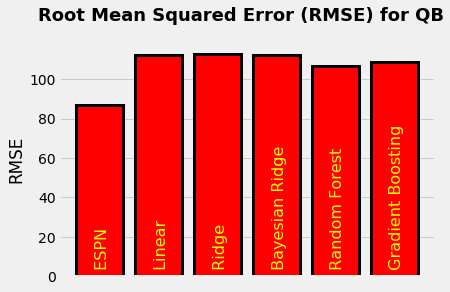

In [49]:
# Root Mean Squared Error Graph

rmsePlot, ax = plt.subplots()

rmseScores = [rmse, rmselinear, rmseridge, rmsebayes, rmserf, rmsegb]
x_pos = np.arange(len(rmseScores))

ax.bar(x_pos, rmseScores, edgecolor = 'black', color = 'red', linewidth = 3)

rmseNames = [" ESPN", " Linear", " Ridge", " Bayesian Ridge", " Random Forest", " Gradient Boosting"]

labels = [i for i in rmseNames]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'yellow', size = 16)

rmsePlot.suptitle("Root Mean Squared Error (RMSE) for QB", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("RMSE")

rmsePlot.savefig('rmseQB-plot.png', dpi = 400, bbox_inches = 'tight')

[['Deshaun Watson', 407.2800000000002], ['Aaron Rodgers', 401.45800000000025], ['Andrew Luck', 366.92499999999995], ['Drew Brees', 360.8270000000003], ['Tom Brady', 357.05899999999986], ['Jimmy Garoppolo', 353.9289999999999], ['Philip Rivers', 348.70799999999974], ['Kirk Cousins', 347.8420000000002], ['Matthew Stafford', 347.0370000000002], ['Patrick Mahomes', 346.49300000000005]]


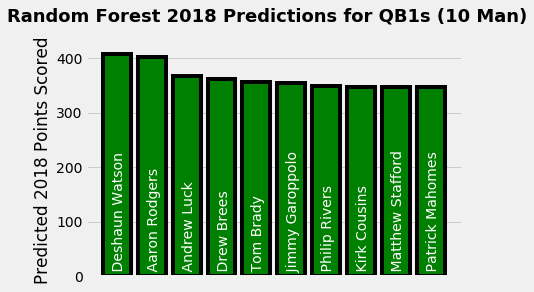

In [50]:
# Predictions for QB1s (QB #1 - QB #10) for using most accurate ML technique (Random Forest) by RMSE

plt.style.use('fivethirtyeight')
rfpredictions, ax = plt.subplots()
rfPlot = []

for i in range(len(rf_preds)):
    rfPlot.append(rf_preds[i][1])
    
combinedRF = [[i, j] for i, j in zip(names, rfPlot)]
sortedRF = sorted(combinedRF, key = itemgetter(1), reverse = True)

QB1RF = []
QB1RF = sortedRF[0:10]
print(QB1RF)

sortedRFdata = [row[1] for row in QB1RF]
x_pos = np.arange(len(sortedRFdata))

ax.bar(x_pos, sortedRFdata, color = 'green' ,edgecolor = 'black', linewidth = 4)
labels = [' '+ row[0] for row in sortedRF]
rects = ax.patches
test = 0
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white')
    test += 1

rfpredictions.suptitle("Random Forest 2018 Predictions for QB1s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 Points Scored")

rfpredictions.savefig('rfpredictionsQB1.png', dpi = 400, bbox_inches = 'tight')

[['Matt Ryan', 344.18799999999993], ['Jared Goff', 343.33399999999995], ['Jameis Winston', 342.76099999999985], ['Carson Wentz', 340.395], ['Ben Roethlisberger', 339.124], ['Cam Newton', 337.28500000000014], ['Dak Prescott', 327.93800000000016], ['Russell Wilson', 325.83600000000007], ['Eli Manning', 320.4620000000001], ['Marcus Mariota', 316.06399999999996]]


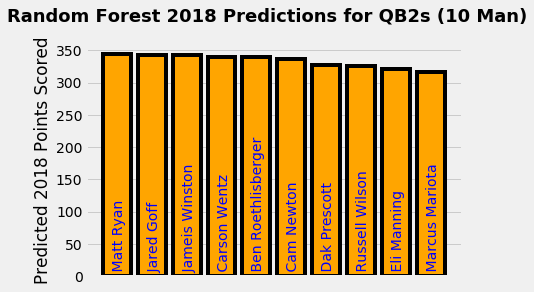

In [51]:
# Predictions for QB2s (QB #11 - QB #20) for using most accurate ML technique (Random Forest) by RMSE

plt.style.use('fivethirtyeight')
rfpredictions, ax = plt.subplots()

QB2RF = []
QB2RF = sortedRF[10:20]
print(QB2RF)

sortedRFdata = [row[1] for row in QB2RF]
x_pos = np.arange(len(sortedRFdata))

ax.bar(x_pos, sortedRFdata, color = 'orange' ,edgecolor = 'black', linewidth = 4)

labelsQB2 = labels[10:20]
rects = ax.patches
test = 0
for rect, label in zip(rects, labelsQB2):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'blue')
    test += 1

rfpredictions.suptitle("Random Forest 2018 Predictions for QB2s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 Points Scored")

rfpredictions.savefig('rfpredictionsQB2.png', dpi = 400, bbox_inches = 'tight')

Average 2018 Season Projections for QB1s:
[['Deshaun Watson', 426.3921615555716], ['Aaron Rodgers', 404.500065109487], ['Andrew Luck', 385.7734454314038], ['Cam Newton', 377.3315002458223], ['Drew Brees', 363.5124843405523], ['Jimmy Garoppolo', 362.5483809824496], ['Kirk Cousins', 361.4184848630767], ['Jameis Winston', 355.5779686882105], ['Tom Brady', 350.4815003527965], ['Matthew Stafford', 350.4666932245479]]


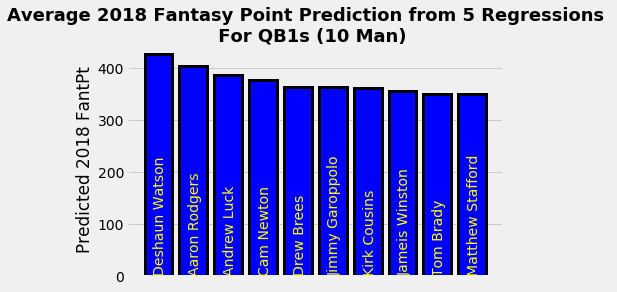

In [55]:
# Average Predictions plot for QB1 (QB#1 - QB#10) 

avgPredictions, ax = plt.subplots()

averagePred = []
name = 0

for h, i ,j ,k , l, in zip(linear_preds, ridge_preds, bayes_preds, rf_preds, gb_preds):
    averagePred.append([linear_preds[name][0], (linear_preds[name][1] + ridge_preds[name][1] + bayes_preds[name][1] + rf_preds[name][1] + gb_preds[name][1]) / 5])
    name += 1

sortedAvg = sorted(averagePred, key = itemgetter(1), reverse = True)
QB1Avg = []
QB1Avg = sortedAvg[0:10]
print("Average 2018 Season Projections for QB1s:")
print(QB1Avg)

sortedAvgData = [row[1] for row in QB1Avg]
x_pos = np.arange(len(sortedAvgData))

ax.bar(x_pos, sortedAvgData, color = 'Blue', edgecolor = 'black', linewidth = 3)

labels = [row[0] for row in sortedAvg]
labelsRB1 = labels[0:10]

rects = ax.patches
for rect, label in zip(rects, labelsRB1):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'yellow')

avgPredictions.suptitle("Average 2018 Fantasy Point Prediction from 5 Regressions \n For QB1s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 FantPt")

avgPredictions.savefig('avg-predictionsQB1.png', dpi = 400, bbox_inches = 'tight')

Average 2018 Season Projections for QB2s:
[['Patrick Mahomes', 345.9231763368788], ['Matt Ryan', 340.4895520150063], ['Carson Wentz', 340.22655650094487], ['Philip Rivers', 338.1754092573749], ['Ben Roethlisberger', 335.0129958825089], ['Jared Goff', 334.4079625962581], ['Dak Prescott', 332.15572924066834], ['Tyrod Taylor', 327.99597401032827], ['Marcus Mariota', 319.1161235763781]]


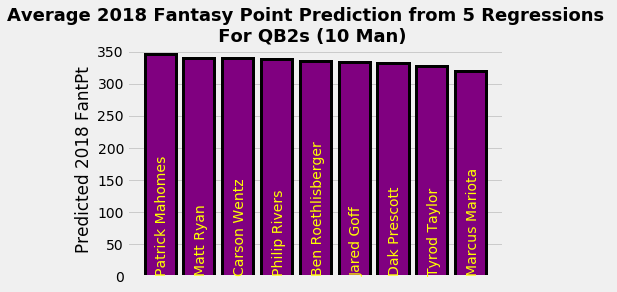

In [56]:
# Average Predictions plot for QB2 (QB#11 - QB#20) 

avgPredictions, ax = plt.subplots()

QB2Avg = []
QB2Avg = sortedAvg[11:20]
print("Average 2018 Season Projections for QB2s:")
print(QB2Avg)

sortedAvgData = [row[1] for row in QB2Avg]
x_pos = np.arange(len(sortedAvgData))

ax.bar(x_pos, sortedAvgData, color = 'purple', edgecolor = 'black', linewidth = 3)

labels = [row[0] for row in sortedAvg]
labelsQB2 = labels[11:20]

rects = ax.patches
for rect, label in zip(rects, labelsQB2):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'yellow')

avgPredictions.suptitle("Average 2018 Fantasy Point Prediction from 5 Regressions \n For QB2s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 FantPt")

avgPredictions.savefig('avg-predictionsQB2.png', dpi = 400, bbox_inches = 'tight')